In [1]:
# common sky als fiber für pca: std Fehler: ~(7 +- 7) %
                            #   norm Fehler: ~(1 +- 1) %
    # go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#import pickle

import matplotlib.pylab as pylab
params = {'legend.fontsize':'xx-large',
         'axes.labelsize':'xx-large',
         'axes.titlesize':'xx-large',
         'ytick.labelsize':'xx-large',
         'xtick.labelsize':'xx-large'}#,
         #'axes.facecolor':'white',
         #'figure.facecolor':'white'}
pylab.rcParams.update(params)
#plt.style.use(['dark_background','seaborn-pastel'])

import glob
import os

from astropy.io import fits
from scipy.signal import medfilt
from scipy.ndimage.filters import gaussian_filter

In [2]:
def gauss(a,b,c,x):
    return a*np.exp(-(x-b)**2/c)**2

In [3]:
# max: pattern = '/work/05865/maja_n/maverick/rebinned20180822/rebinned*_exp0?_multi*_042_*RL.fits.fits'
# sind nicht alle rebinned, die "originalen" Spektren sind drinnen. Ich benutze die gerade, weil es einfacher ist als
# erstmal zu gucken, ob überall Himmelsspektren dabei sind und so. 

#pattern = 'withwavelength/rebinned*_exp0?_multi*_042_*RL.fits.fits'
pattern = '/media/maja/Elements/rebinned20180822/rebinned20180822v02*_exp03_multi*.fits.fits'
pattern2 = '/media/maja/Elements/rebinned20180822/rebinned*_exp0?_multi*_042_*LL.fits.fits'
#pattern = '/media/maja/Elements/work/03946/hetdex/maverick/red1/reductions/201801*/virus/*/exp0?/virus/multi*_042_*LL.fits'
ff = glob.glob(pattern)
ff = np.array(ff)
ff2 = glob.glob(pattern2)
print(len(ff))

668


In [4]:
fiber = []
here = [x[-20:-18]!='09' for x in ff]

#print(here)
for f in ff[np.where(here)]:
    hdu = fits.open(f)
    fiber.append(hdu['sky_spectrum'].data)
    hdu.close()
fiber = np.array(fiber)
fiber.shape

(592, 112, 1032)

In [31]:
fiberarray = np.concatenate([x[:,4:] for x in fiber])
fiberarray[np.where(np.isnan(fiberarray))] = 0

In [32]:
i = 0
fiberarray[i] = fiberarray[i]+gauss(10,600,8, np.arange(0,fiberarray.shape[-1],1)) 

In [33]:
#plt.matshow(fiberarray.T, vmin=10, vmax=300)

In [34]:
fiberarray.shape

(66304, 1028)

In [35]:
meanspec = np.nanmean(fiberarray[:], axis=0)
stdspec = np.nanstd(fiberarray[:],axis=0)

fiberarray_0 = (fiberarray-meanspec)/stdspec

In [36]:
stdspec.shape

(1028,)

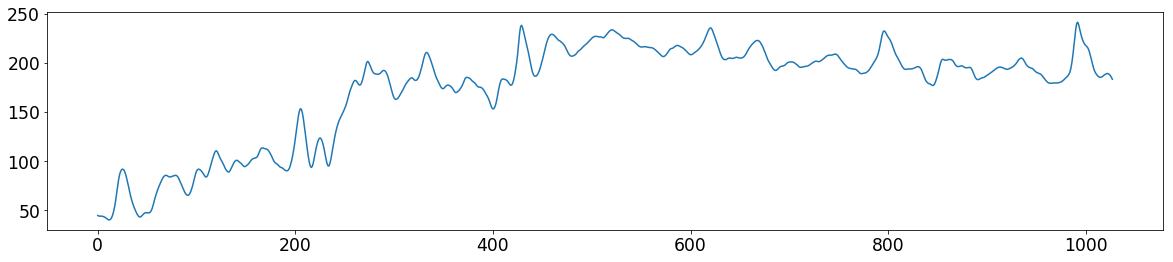

In [37]:
plt.figure(figsize=(20,4))
plt.plot(meanspec)

In [38]:
cov = np.cov(fiberarray_0.T)

In [39]:
eigenvals, eigenvecs = np.linalg.eig(cov)
eigenvals = np.real(eigenvals)
eigenvecs = np.real(eigenvecs)

eigenpairs = [(np.abs(eigenvals[i]), eigenvecs[:,i]) for i in np.argsort(abs(eigenvals))[::-1]]

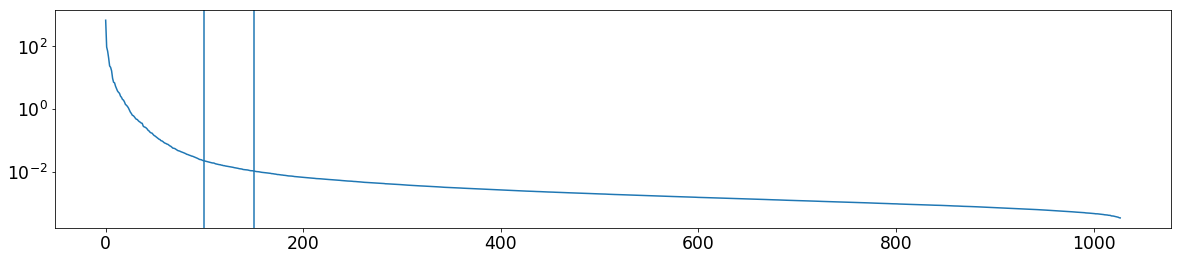

In [40]:
plt.figure(figsize=(20,4))
plt.plot([x[0] for x in eigenpairs])
plt.axvline(100)
plt.axvline(150)
plt.yscale('log')

In [41]:
ncomp = 150

imp = np.array([eigenpairs[i][1] for i in range(ncomp)])

In [42]:
imp.shape

(150, 1028)

In [43]:
fiberpca = np.dot(fiberarray_0, imp.T)

In [44]:
fiberpca.shape

(66304, 150)

In [45]:
fiberarray_0.shape

(66304, 1028)

In [46]:
new = np.dot(fiberpca, imp)

In [47]:
new.shape

(66304, 1028)

In [48]:
newspec = new*stdspec+meanspec

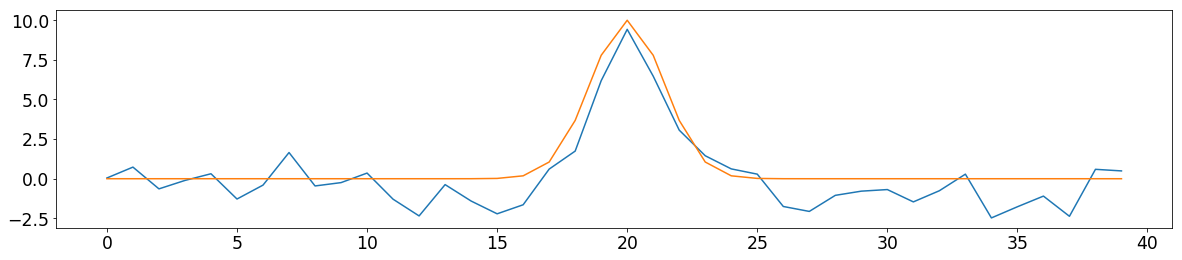

In [49]:
plt.figure(figsize=(20,4))
plt.plot(fiberarray[i,580:620]-newspec[i,580:620])
plt.plot(gauss(10,600,8, np.arange(0,fiber.shape[-1],1))[580:620])

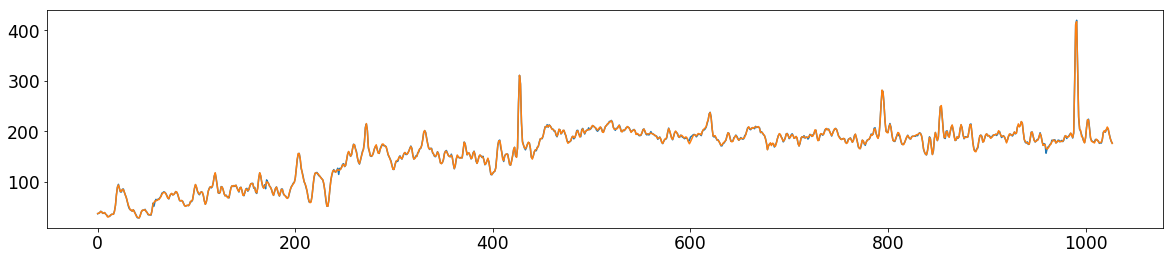

In [50]:
plt.figure(figsize=(20,4))
plt.plot(fiberarray[i,:])
plt.plot(newspec[i,:])

In [51]:
re = (fiberarray-newspec)/fiberarray

In [52]:
#plt.matshow(re.T, vmin=-.01, vmax=.01)

In [53]:
np.nanstd(re[i])

0.011212812207520942

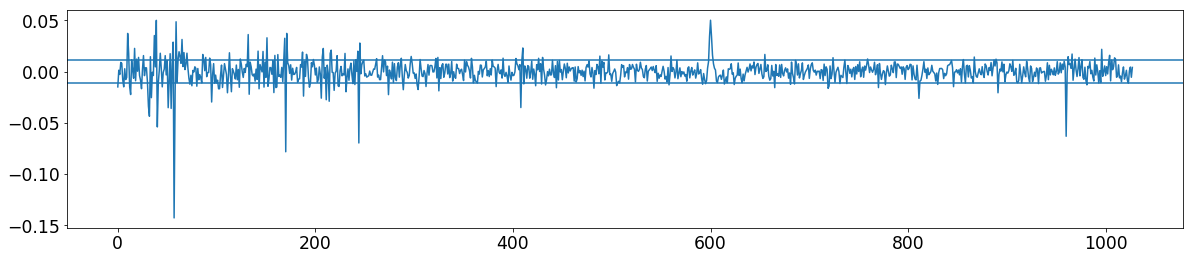

In [54]:
plt.figure(figsize=(20,4))
plt.plot(re[i])
plt.axhline(np.nanstd(re[i]))
plt.axhline(-np.nanstd(re[i]))

Text(0, 0.5, 'PC 13')

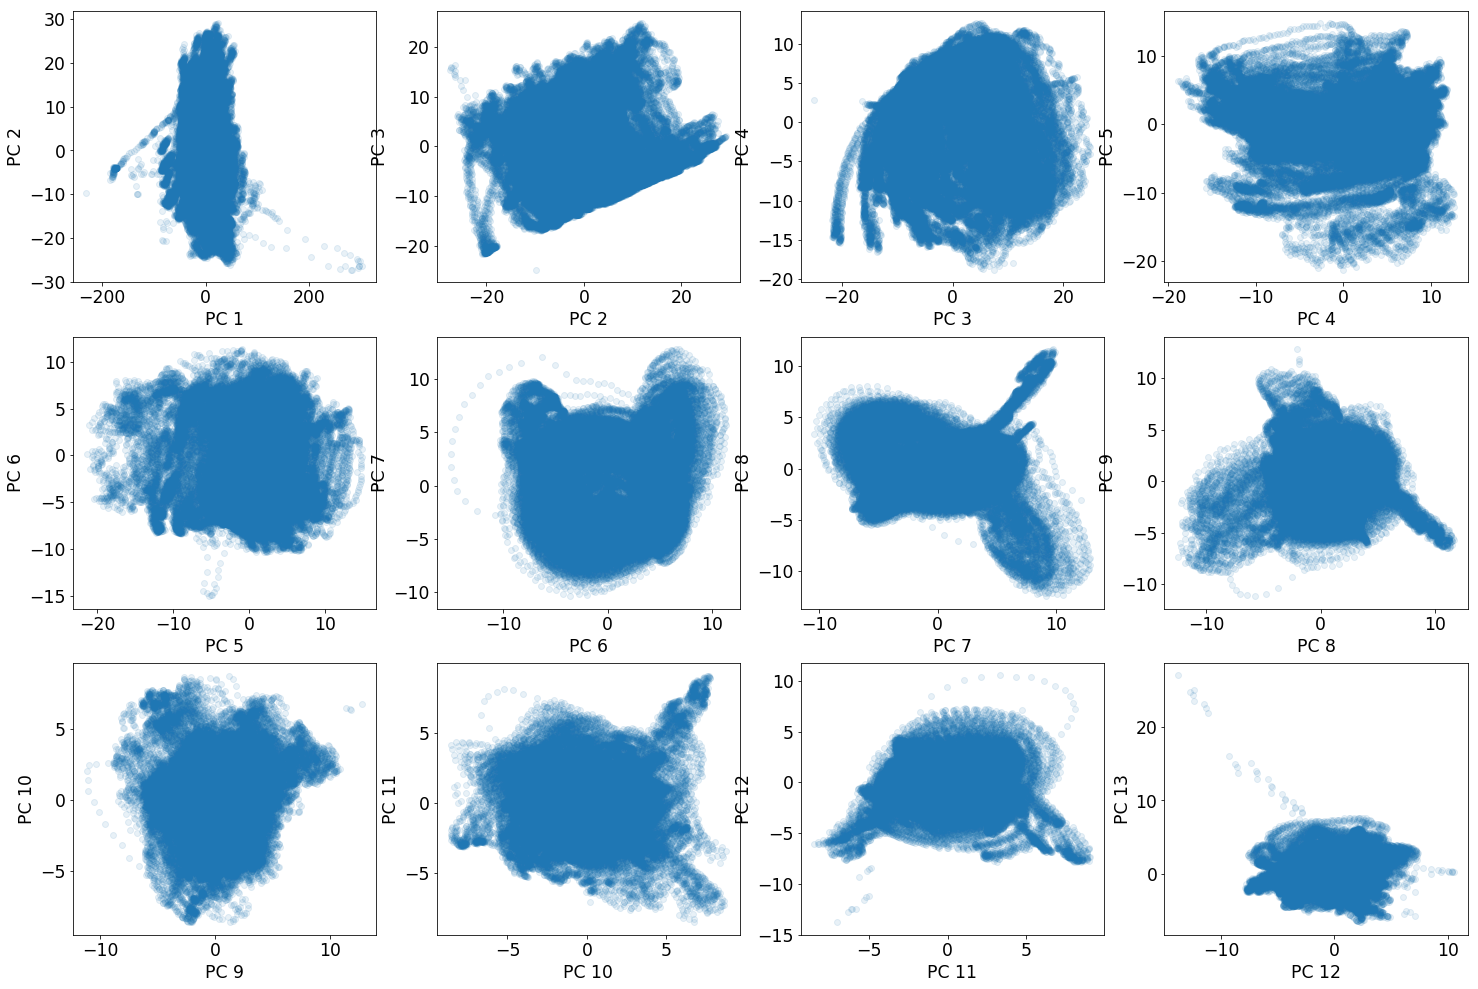

In [55]:
plt.figure(figsize=(25, 17))
plt.subplot(341)
plt.scatter(fiberpca[:,0], fiberpca[:,1], alpha=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.subplot(342)
plt.scatter(fiberpca[:,1], fiberpca[:,2], alpha=0.1)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.subplot(343)
plt.scatter(fiberpca[:,2], fiberpca[:,3], alpha=0.1)
plt.xlabel('PC 3')
plt.ylabel('PC 4')
plt.subplot(344)
plt.scatter(fiberpca[:,3], fiberpca[:,4], alpha=0.1)
plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.subplot(345)
plt.scatter(fiberpca[:,4], fiberpca[:,5], alpha=0.1)
plt.xlabel('PC 5')
plt.ylabel('PC 6')
plt.subplot(346)
plt.scatter(fiberpca[:,5], fiberpca[:,6], alpha=0.1)
plt.xlabel('PC 6')
plt.ylabel('PC 7')
plt.subplot(347)
plt.scatter(fiberpca[:,6], fiberpca[:,7], alpha=0.1)
plt.xlabel('PC 7')
plt.ylabel('PC 8')
plt.subplot(348)
plt.scatter(fiberpca[:,7], fiberpca[:,8], alpha=0.1)
plt.xlabel('PC 8')
plt.ylabel('PC 9')
plt.subplot(349)
plt.scatter(fiberpca[:,8], fiberpca[:,9], alpha=0.1)
plt.xlabel('PC 9')
plt.ylabel('PC 10')
plt.subplot(3,4,10)
plt.scatter(fiberpca[:,9], fiberpca[:,10], alpha=0.1)
plt.xlabel('PC 10')
plt.ylabel('PC 11')
plt.subplot(3,4,11)
plt.scatter(fiberpca[:,10], fiberpca[:,11], alpha=0.1)
plt.xlabel('PC 11')
plt.ylabel('PC 12')
plt.subplot(3,4,12)
plt.scatter(fiberpca[:,11], fiberpca[:,12], alpha=0.1)
plt.xlabel('PC 12')
plt.ylabel('PC 13')
#plt.savefig('fiberpcas.png', bbox_inches='tight')

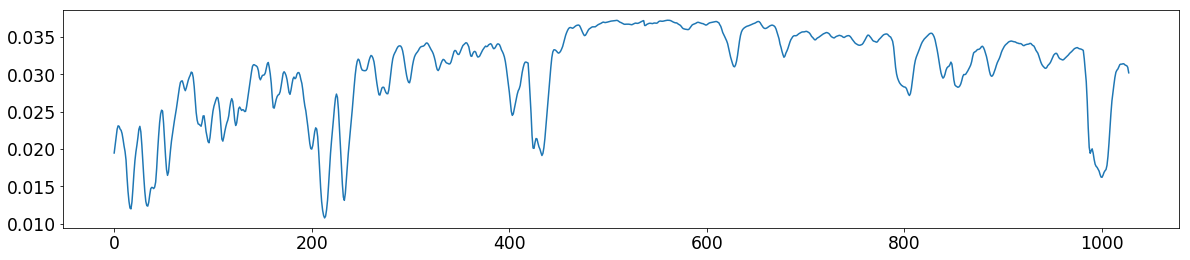

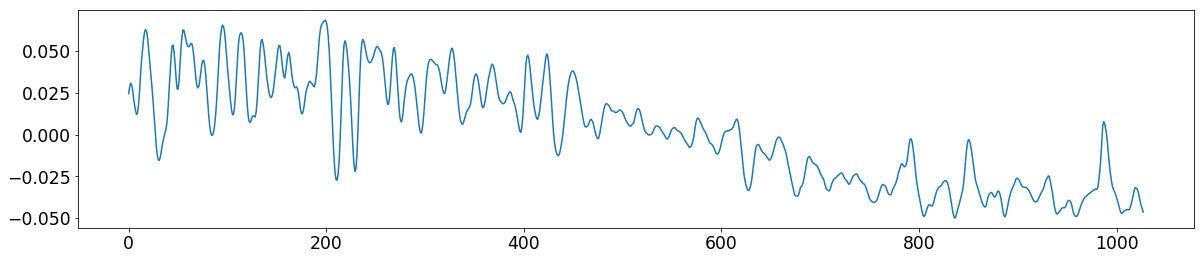

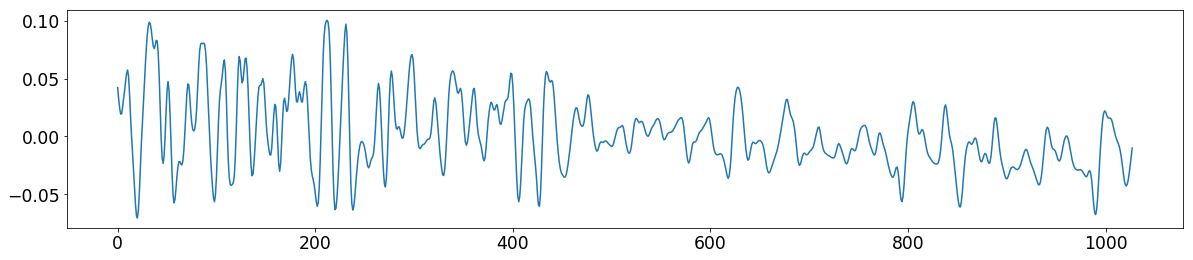

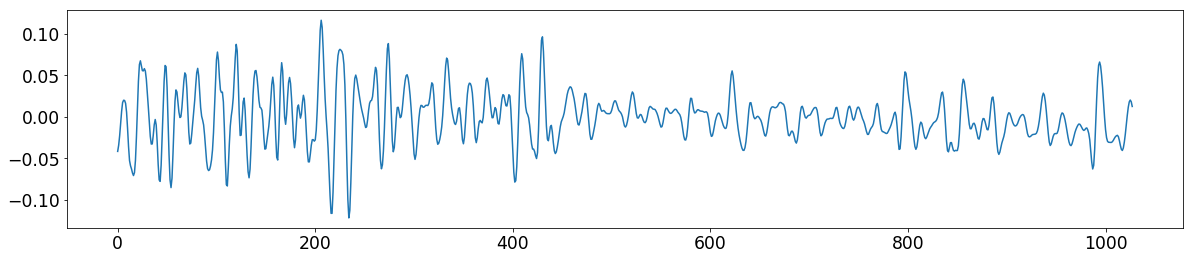

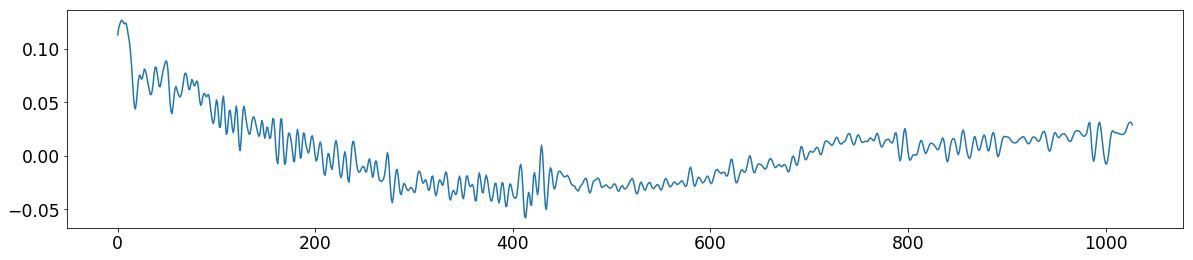

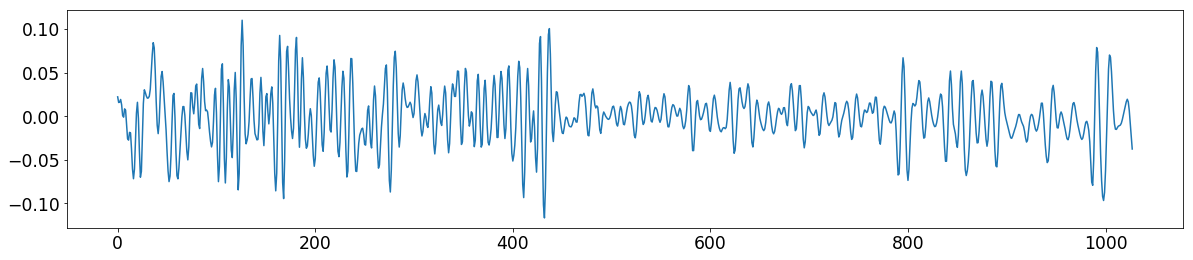

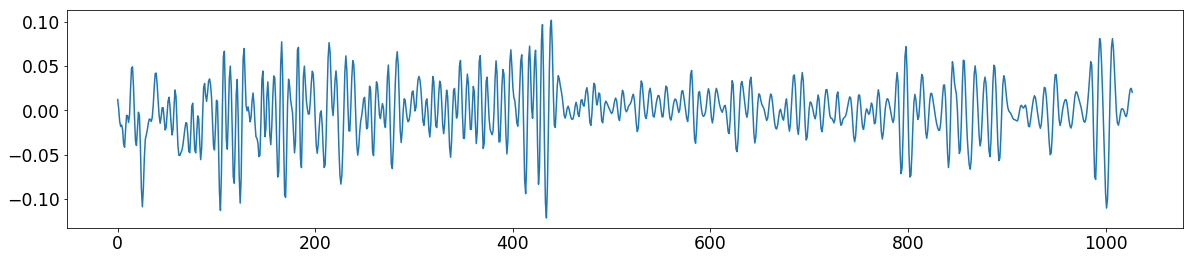

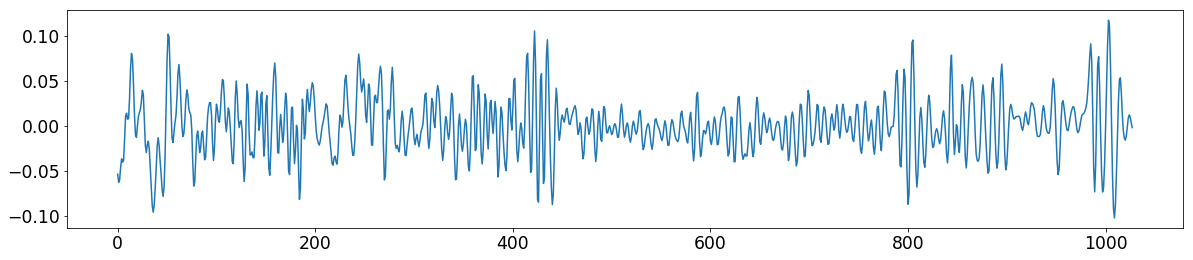

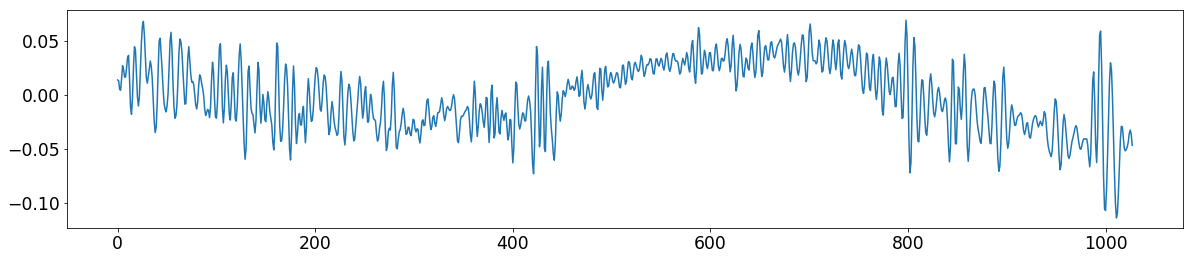

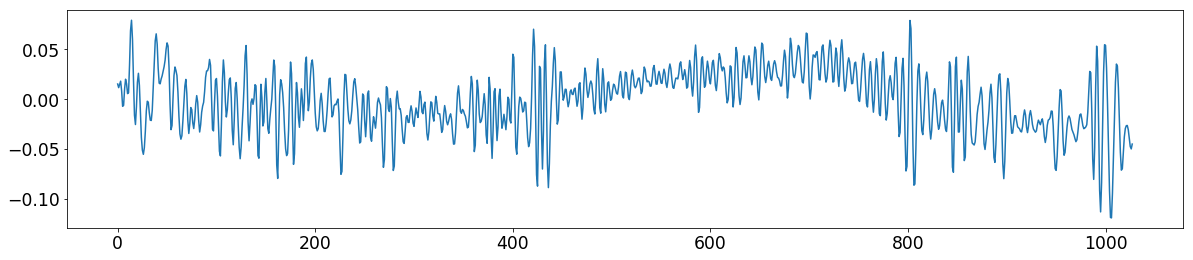

In [56]:
for j in range(0,10):
    plt.figure(figsize=(20,4))
    plt.plot(imp[j])

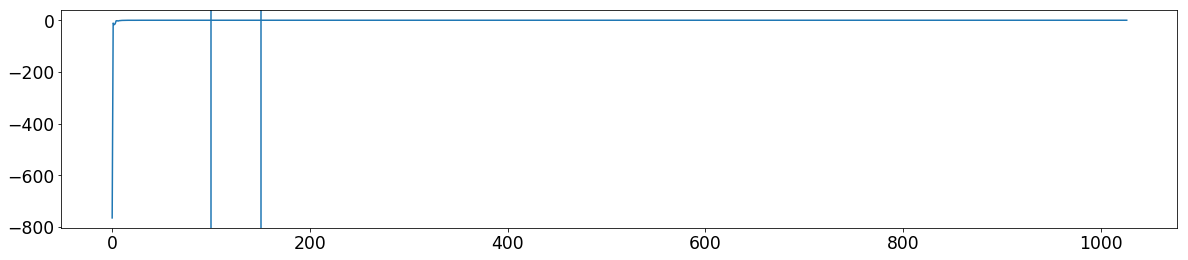

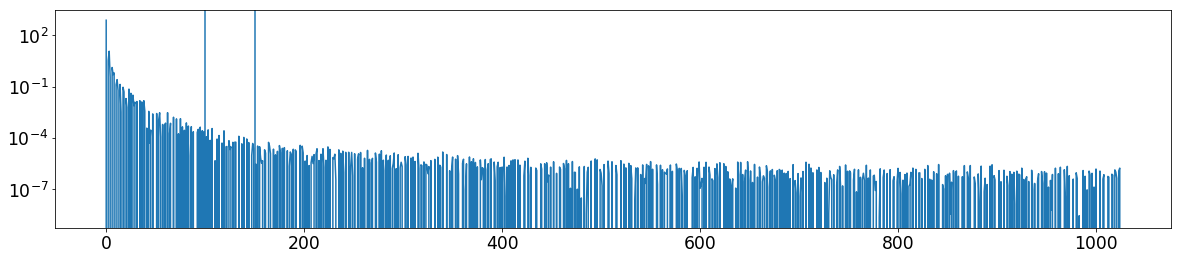

In [89]:
orderedeigenvals = np.array([x[0] for x in eigenpairs])
diff1 = np.diff(orderedeigenvals,1)
diff2 = np.diff(orderedeigenvals,2)

plt.figure(figsize=(20,4))
plt.plot(diff1)
plt.axvline(100)
plt.axvline(150)
#plt.yscale('log')

plt.figure(figsize=(20,4))
plt.plot(diff2)
plt.axvline(100)
plt.axvline(150)
plt.yscale('log')

In [2]:
from mpl_toolkits.mplot3d import Axes3D

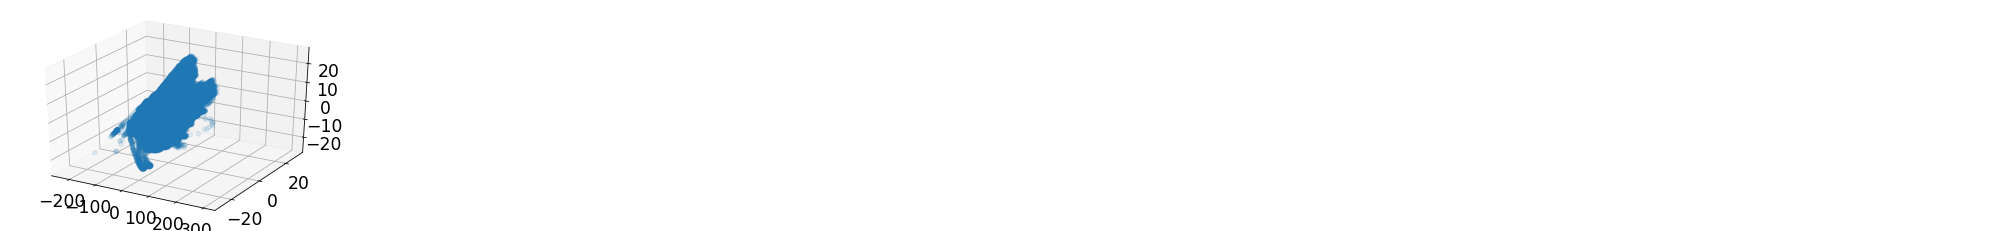

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fiberpca[:,0], fiberpca[:,1], fiberpca[:,2], alpha=0.1)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.zlabel('PC 3')

Text(0, 0.5, 'PC 5')

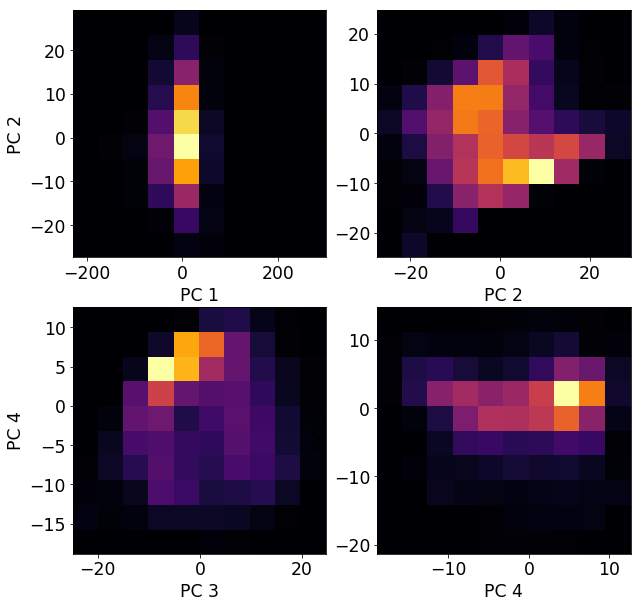

In [108]:
cmap = 'inferno'
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist2d(fiberpca[:,0], fiberpca[:,1], cmap=cmap)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.subplot(222)
plt.hist2d(fiberpca[:,1], fiberpca[:,2], cmap=cmap)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.subplot(223)
plt.hist2d(fiberpca[:,2], fiberpca[:,3], cmap=cmap)
plt.xlabel('PC 3')
plt.ylabel('PC 4')
plt.subplot(224)
plt.hist2d(fiberpca[:,3], fiberpca[:,4], cmap=cmap)
plt.xlabel('PC 4')
plt.ylabel('PC 5')